In [1]:
import pandas as pd
import numpy as np
import difflib 

# Load impact ranking file
impact = pd.read_csv("journalimpact2014.csv")

# Remove unecessary columns
impact = impact.drop(impact.columns[5::], axis=1)


# Rename Issn --> ISSN  
impact = impact.rename(columns = {"Issn":"ISSN"})


In [2]:
# Keep the first ISSN and keep it in a new column
impact["ISSN1"] = impact.ISSN.str.replace(", .*", "")
impact["ISSN1"] = impact.ISSN1.str.replace("ISSN", "")
impact["ISSN1"] = impact.ISSN1.str.replace("X", "")
impact

# Keep the second ISSN if it appears in a new column and only keep unique values
impact["ISSN2"] = impact.ISSN.str.replace(".*, ", "")
impact["ISSN2"] = impact.ISSN2.str.replace("ISSN", "")
impact["ISSN2"] = impact.ISSN2.str.replace("X", "")

# to compare by name more normalising required

impact["Title"] = impact.Title.str.lower()
impact["Title"] = impact.Title.str.replace("-.*","")

impact

,Rank,Title,Type,ISSN,SJR,ISSN1,ISSN2
0,1,nature reviews genetics,journal,"ISSN 14710056, 14710064",29.060,14710056,14710064
1,2,nature reviews immunology,journal,ISSN 14741733,27.410,14741733,14741733
2,3,nature reviews cancer,journal,ISSN 1474175X,24.713,1474175,1474175
3,4,nature reviews molecular cell biology,journal,"ISSN 14710072, 14710080",24.474,14710072,14710080
4,5,nature genetics,journal,ISSN 10614036,23.792,10614036,10614036
5,6,journal of finance,journal,"ISSN 15406261, 00221082",21.621,15406261,00221082
6,7,econometrica,journal,"ISSN 00129682, 14680262",20.791,00129682,14680262
7,8,nature,journal,"ISSN 14764687, 00280836",18.640,14764687,00280836
8,9,nature nanotechnology,journal,ISSN 17483387,17.133,17483387,17483387
9,10,nature biotechnology,journal,ISSN 10870156,16.443,10870156,10870156


In [3]:
# Load the data output file
refcs_or = pd.read_csv("REF2014Data_output.csv")

## Keep only the volume title and ISSN number
refcs_or = refcs_or.drop(refcs_or.columns[[range(1,8)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[[range(2,7)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[3::], axis=1)
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('X', '')
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('-', '')

# to compare by name more normalising required

refcs_or["VolumeTitle"] = refcs_or.VolumeTitle.str.lower()
refcs_or["VolumeTitle"] = refcs_or.VolumeTitle.str.replace("-.*","")
refcopy = refcs_or

refcs_or

,UKPRN,VolumeTitle,ISSN
0,10000291,computers & education,03601315
1,10000291,social responsibility journal,17471117
2,10000291,learning media and technology,17439884
3,10000291,european journal of open and distance learning,10275207
4,10000291,contemporary nurse,10376178
5,10000291,research in nursing & health,1098240
6,10000291,NaN,NaN
7,10000291,journal for critical education policy studies,17402743
8,10000291,european early childhood education research jo...,17521807
9,10000291,european early childhood education research jo...,17521807


In [4]:
# Compile a dictionary of Volume title and Rank to merge by names
namerank = {}
for index, row in impact.iterrows():
    namerank[row["ISSN2"]] = row["SJR"]

In [5]:
# Compile a list of index from the REF data and volume title
reference = {}
for index, row in refcs_or.iterrows():
    reference[index] = row["ISSN"]

In [6]:
# Merge by name returning index location and ranking

indeximpact = {}
for index in reference:
    if reference[index] in namerank:
        indeximpact[index] = namerank[reference[index]]
        
len(indeximpact)

867

In [7]:

refcopy["Rank1"] = pd.Series(indeximpact)

refcopy = refcopy.dropna()

In [8]:
## Find the average ranks to fill the nans with the mean ranks for each uni
sum_rank = {}
len_rank = {}

#for index, rows in av_rankd.iterrows():

for index, rows in refcopy.iterrows():
    if rows["UKPRN"] not in len_rank:
        len_rank[rows["UKPRN"]] = 1
    else:
        len_rank[rows["UKPRN"]] += 1
        
for index, rows in refcopy.iterrows():    
    if rows["UKPRN"] not in sum_rank:
        sum_rank[rows["UKPRN"]] = rows["Rank1"]
    else:
        sum_rank[rows["UKPRN"]] += rows["Rank1"]
        
av_rank = {}

for univd in len_rank:
    for univid in sum_rank:
        if univd == univid:
            av_rank[univd] = sum_rank[univd] / len_rank[univid]

In [9]:
#

indexlist = list()
rankinglist = list()

for index, row in refcopy.iterrows():
    for uniid in av_rank:
        if uniid == row["UKPRN"]:
            indexlist.append(uniid)
            rankinglist.append(av_rank[uniid])


In [10]:
## Now to create a dictionary with the average ranking per uni
unijourank = dict(zip(indexlist,rankinglist))

In [11]:
## Now to add the four star rating
fourstr = pd.read_csv("REF2014Data_submissionprofile.csv")



fourstr = fourstr[fourstr["Profile"].str.contains("Output")]
fourstr = fourstr.drop(fourstr.columns[[1,2,3,5,6,7,8]], axis=1)

fourstrdic = {}

for index, row in fourstr.iterrows():
    fourstrdic[row["UKPRN"]] = row["FourStar"]

In [12]:
rankfour = {}

for uni in fourstrdic:
    for unis in unijourank:
        if unis == uni:
            rankfour[unijourank[unis]] = fourstrdic[uni]

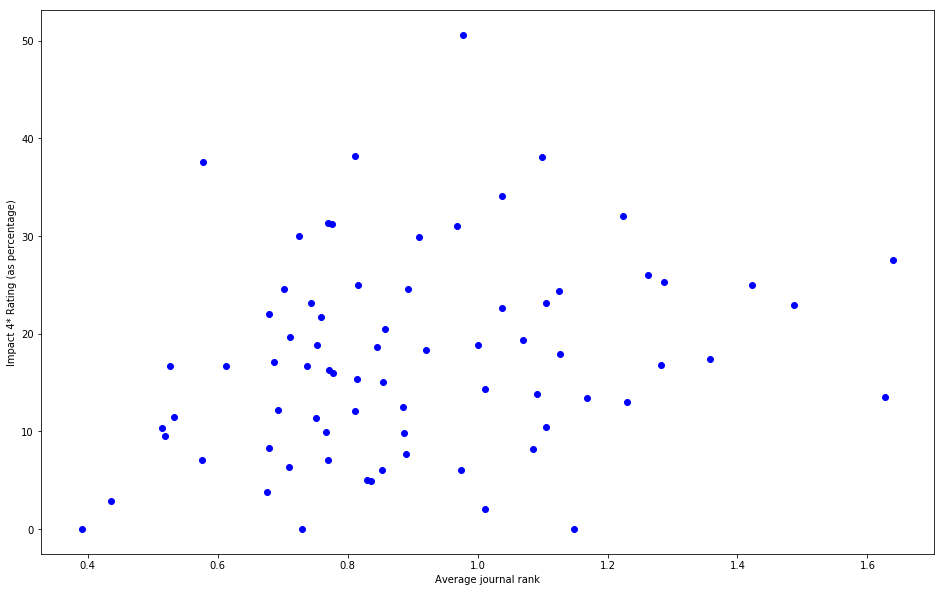

In [13]:
import matplotlib.pylab as plt
%matplotlib inline

lists = sorted(rankfour.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = [16,10])
plt.plot(x, y, "bo")
plt.xlabel("Average journal rank")
plt.ylabel("Impact 4* Rating (as percentage)")

plt.savefig("jpeg")
#plt.xscale('log')
#plt.yscale('log')

In [14]:
from scipy.stats.stats import pearsonr

pearsonr(x,y)

(0.24841618546652536, 0.032830332932744066)